### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print("Setup Complete")

Setup Complete


---
<br>

### Importing Dataset and Data Preparation

In [2]:
fifa_data_orig = pd.read_csv("fifa_ranking.csv", index_col = "rank_date", parse_dates = True)

In [3]:
fifa_data_orig.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
rank_date,,,,,,,,,,,,,,,
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [4]:
fifa_data = fifa_data_orig.copy()

In [5]:
fifa_data = fifa_data[["rank", "country_full"]]

In [6]:
fifa_data = fifa_data[fifa_data["country_full"].isin(["Argentina", "Brazil", "Spain", "France", "Germany", "Italy"])]

In [7]:
fifa_data_pivot = fifa_data.pivot_table(values = "rank", columns = "country_full", index = "rank_date")

In [8]:
fifa_data_pivot.columns = ["ARG", "BRA", "FRA", "GER", "ITA", "ESP"]

In [9]:
fifa_data_pivot.head()

,ARG,BRA,FRA,GER,ITA,ESP
rank_date,,,,,,
1993-08-08,5,8,12,1,2,13
1993-09-23,12,1,7,5,2,14
1993-10-22,9,1,14,4,3,7
1993-11-19,9,4,15,3,1,7
1993-12-23,8,3,15,1,2,5


In [10]:
fifa_data = fifa_data_pivot
del(fifa_data_pivot)

---
<br>

### Data Visualization

#### Hello, Seaborn

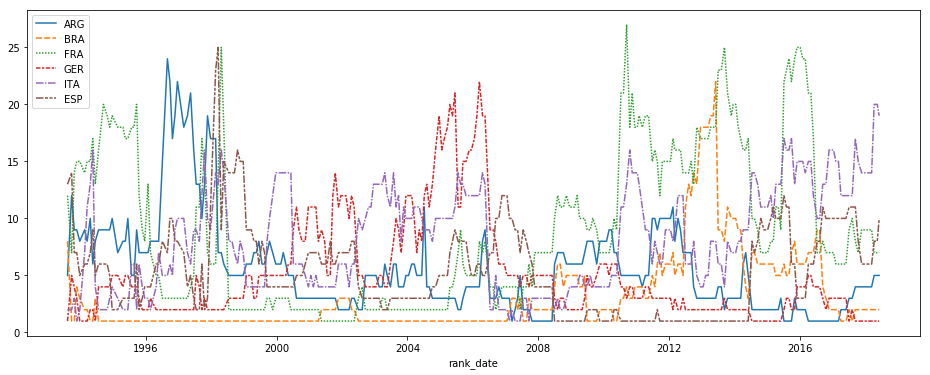

In [11]:
plt.figure(figsize = (16, 6))

sns.lineplot(data = fifa_data)
plt.show()

---
<br>

### Line Charts

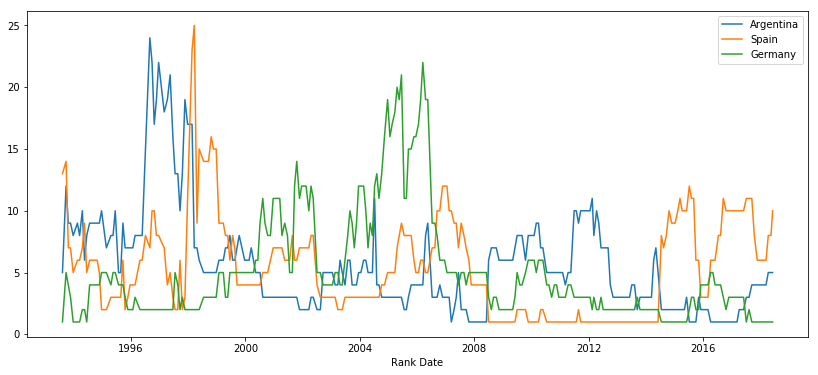

In [12]:
plt.figure(figsize = (14, 6))

sns.lineplot(data = fifa_data["ARG"], label = "Argentina")
sns.lineplot(data = fifa_data["ESP"], label = "Spain")
sns.lineplot(data = fifa_data["GER"], label = "Germany")

plt.xlabel("Rank Date")
plt.show()

---
<br>

### Bar Chart

In [13]:
fifa_data.index = pd.Series(fifa_data.index).dt.to_period('Y')

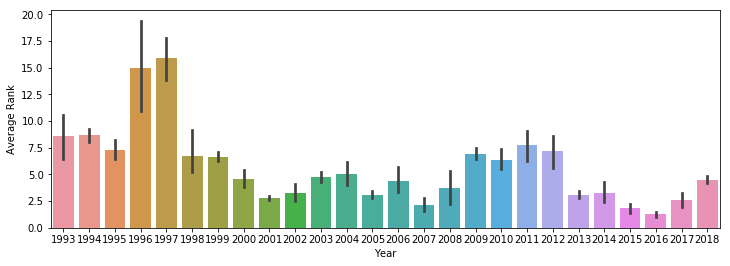

In [14]:
plt.figure(figsize = (12, 4))

sns.barplot(x = fifa_data.index, y = fifa_data["ARG"])

plt.xlabel("Year")
plt.ylabel("Average Rank")
plt.show()

---
<br>

### Heatmap

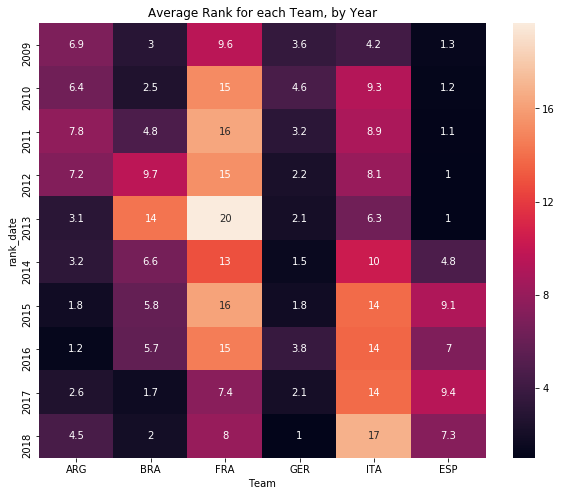

In [15]:
plt.figure(figsize = (10, 8))

plt.title("Average Rank for each Team, by Year")

sns.heatmap(data = fifa_data[fifa_data.index > 2008].groupby(by = "rank_date").mean(), annot = True)

plt.xlabel("Team")
plt.show()

---
<br>

### Scatter Plots

In [16]:
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

In [18]:
labels = pd.Series(['virginica' if i == 2 else i for i in ['versicolor' if i == 1 else i for i in ['setosa' if i == 0 else i for i in iris.target]]], name = "species")

In [19]:
iris_data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_data = iris_data.join(labels)
iris_data = iris_data.fillna(0)

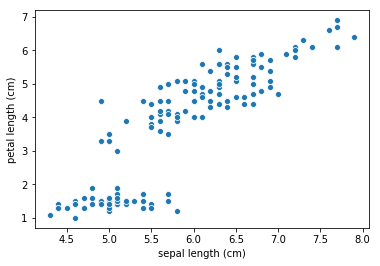

In [20]:
sns.scatterplot(x = iris_data['sepal length (cm)'], y = iris_data['petal length (cm)'])
plt.show()

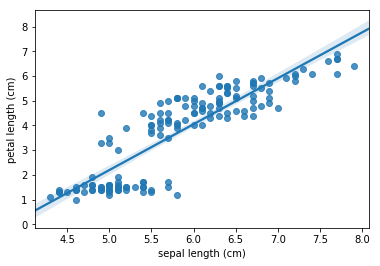

In [21]:
sns.regplot(x = iris_data['sepal length (cm)'], y = iris_data['petal length (cm)'])
plt.show()

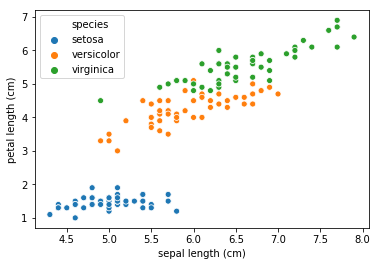

In [22]:
sns.scatterplot(x = iris_data['sepal length (cm)'], y = iris_data['petal length (cm)'], hue = iris_data['species'])
plt.show()

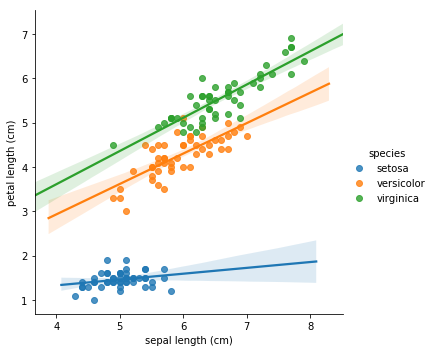

In [23]:
sns.lmplot(x = 'sepal length (cm)', y = 'petal length (cm)', hue = 'species', data = iris_data)
plt.show()

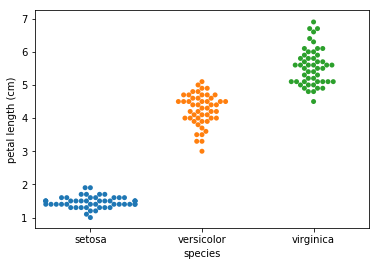

In [24]:
sns.swarmplot(x = iris_data['species'], y = iris_data['petal length (cm)'])
plt.show()

---
<br>

### __Distributions__

---
<br>

### Histograms
<br>

Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.distplot command.

We customize the behavior of the command with two additional pieces of information:

a= chooses the column we'd like to plot (in this case, we chose 'Petal Length (cm)').

kde=False is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

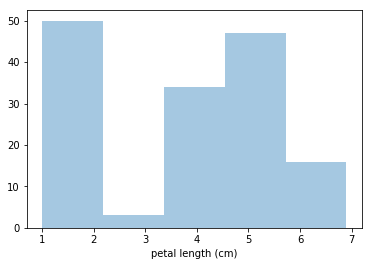

In [25]:
sns.distplot(a = iris_data["petal length (cm)"], kde = False)
plt.show()

---
<br>

### Density plots
<br>
The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= has identical functionality as when we made the histogram above).

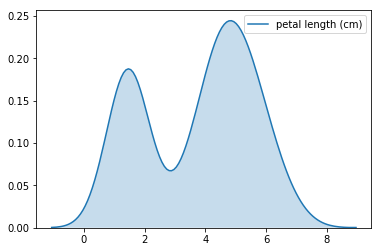

In [26]:
sns.kdeplot(data = iris_data['petal length (cm)'], shade = True)
plt.show()

---
<br>

### 2D KDE plots
<br>

We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

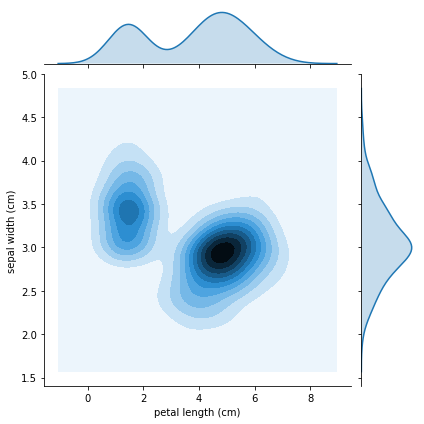

In [27]:
sns.jointplot(x = iris_data['petal length (cm)'], y = iris_data['sepal width (cm)'], kind = 'kde')
plt.show()

---
<br>

### Color-coded plots
<br>
For the next part of the tutorial, we'll create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In this case, the legend does not automatically appear on the plot. To force it to show (for any plot type), we can always use plt.legend().

In [28]:
iris_set_data = iris_data[iris_data["species"] == 'setosa']
iris_ver_data = iris_data[iris_data["species"] == 'versicolor']
iris_vir_data = iris_data[iris_data["species"] == 'virginica']

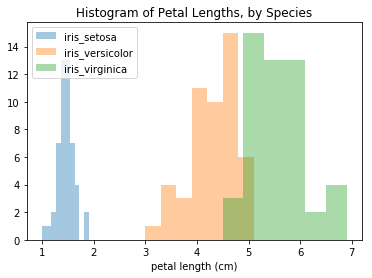

In [29]:
sns.distplot(a = iris_set_data["petal length (cm)"], label = "iris_setosa", kde = False)
sns.distplot(a = iris_ver_data["petal length (cm)"], label = "iris_versicolor", kde = False)
sns.distplot(a = iris_vir_data["petal length (cm)"], label = "iris_virginica", kde = False)

plt.title("Histogram of Petal Lengths, by Species")
plt.legend()
plt.show()

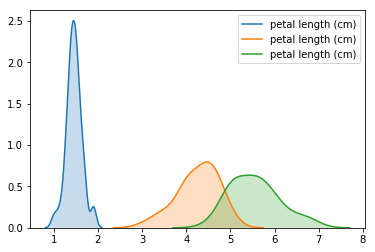

In [30]:
sns.kdeplot(data = iris_set_data["petal length (cm)"], shade = True)
sns.kdeplot(data = iris_ver_data["petal length (cm)"], shade = True)
sns.kdeplot(data = iris_vir_data["petal length (cm)"], shade = True)
plt.show()

---
<br>

### Changing Styles with Seaborn

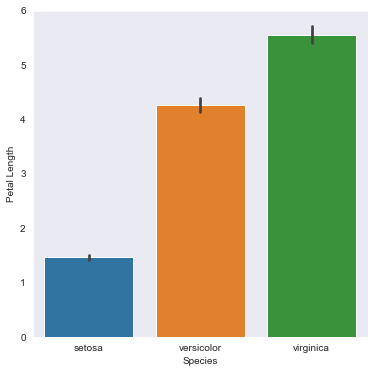

In [31]:
sns.set_style("dark")

plt.figure(figsize = (6, 6))
sns.barplot(x = iris_data['species'], y = iris_data['petal length (cm)'])

plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.show()